In [1]:
!pip install gap-stat

In [46]:
import pandas as pd
import numpy as np
from google.colab import files
from scipy.spatial import distance 
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette, fcluster
from matplotlib import pyplot as plt
from gap_statistic import OptimalK
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import statsmodels.api as sm

In [3]:
# upl = files.upload()

In [4]:
import io
# df = pd.read_csv(io.BytesIO(upl['heart_failure_clinical_records_dataset.csv']))
df = pd.read_csv('https://raw.githubusercontent.com/bmurphy1993/NYU_ML_Final_Project/main/heart_failure_clinical_records_dataset.csv')

In [5]:
df.shape

(299, 13)

In [6]:
df.head(n = 10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
df_new = df.rename(columns={'age': 'Age', "anaemia" : "Anaemia", "creatinine_phosphokinase" : "CPK", "diabetes" : "Diabetes", "ejection_fraction" : "EF", 
"high_blood_pressure" : "High BP", "platelets" : "Platelet Count", "serum_creatinine" : "Creat", "serum_sodium" : "Serum Na", "sex" : "Sex", 
"smoking" : "Smoking", "time" : "Time", "DEATH_EVENT" : "Death" })
df_new.head(n = 10)

,Age,Anaemia,CPK,Diabetes,EF,High BP,Platelet Count,Creat,Serum Na,Sex,Smoking,Time,Death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [8]:
df_new.isnull().values.any()

False

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             299 non-null    float64
 1   Anaemia         299 non-null    int64  
 2   CPK             299 non-null    int64  
 3   Diabetes        299 non-null    int64  
 4   EF              299 non-null    int64  
 5   High BP         299 non-null    int64  
 6   Platelet Count  299 non-null    float64
 7   Creat           299 non-null    float64
 8   Serum Na        299 non-null    int64  
 9   Sex             299 non-null    int64  
 10  Smoking         299 non-null    int64  
 11  Time            299 non-null    int64  
 12  Death           299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df_new = df_new.astype(float)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             299 non-null    float64
 1   Anaemia         299 non-null    float64
 2   CPK             299 non-null    float64
 3   Diabetes        299 non-null    float64
 4   EF              299 non-null    float64
 5   High BP         299 non-null    float64
 6   Platelet Count  299 non-null    float64
 7   Creat           299 non-null    float64
 8   Serum Na        299 non-null    float64
 9   Sex             299 non-null    float64
 10  Smoking         299 non-null    float64
 11  Time            299 non-null    float64
 12  Death           299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


In [12]:
df_new.head(n = 10)

,Age,Anaemia,CPK,Diabetes,EF,High BP,Platelet Count,Creat,Serum Na,Sex,Smoking,Time,Death
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
5,90.0,1.0,47.0,0.0,40.0,1.0,204000.00,2.1,132.0,1.0,1.0,8.0,1.0
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0,1.0,0.0,10.0,1.0
7,60.0,1.0,315.0,1.0,60.0,0.0,454000.00,1.1,131.0,1.0,1.0,10.0,1.0
8,65.0,0.0,157.0,0.0,65.0,0.0,263358.03,1.5,138.0,0.0,0.0,10.0,1.0
9,80.0,1.0,123.0,0.0,35.0,1.0,388000.00,9.4,133.0,1.0,1.0,10.0,1.0


In [13]:
df_new["Death"].value_counts()

0.0    203
1.0     96
Name: Death, dtype: int64

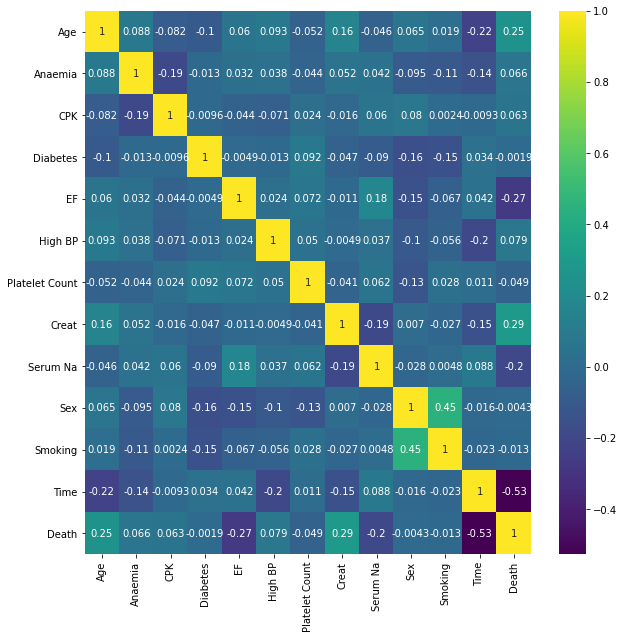

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), cmap="viridis", annot= True)

In [15]:
int_cols = ['CPK', 'Platelet Count','Creat','EF','Age', 'Serum Na']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_new[['CPK', 'Platelet Count','Creat','EF','Age', 'Serum Na']])
scaled_df = df_new.copy()
scaled_df[int_cols] = scaled_features
scaled_df.shape

(299, 13)

Text(0, 0.5, '% Variance Explained')

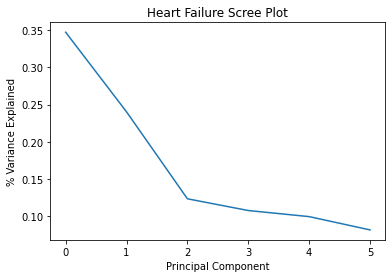

In [16]:
pca = PCA(n_components = 6)
PC= pca.fit_transform(scaled_df[int_cols].values)
plt.plot(range(6), pca.explained_variance_ratio_)
plt.title('Heart Failure Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')

In [17]:
PC1 = PC[:,0]
PC2 = PC[:,1]

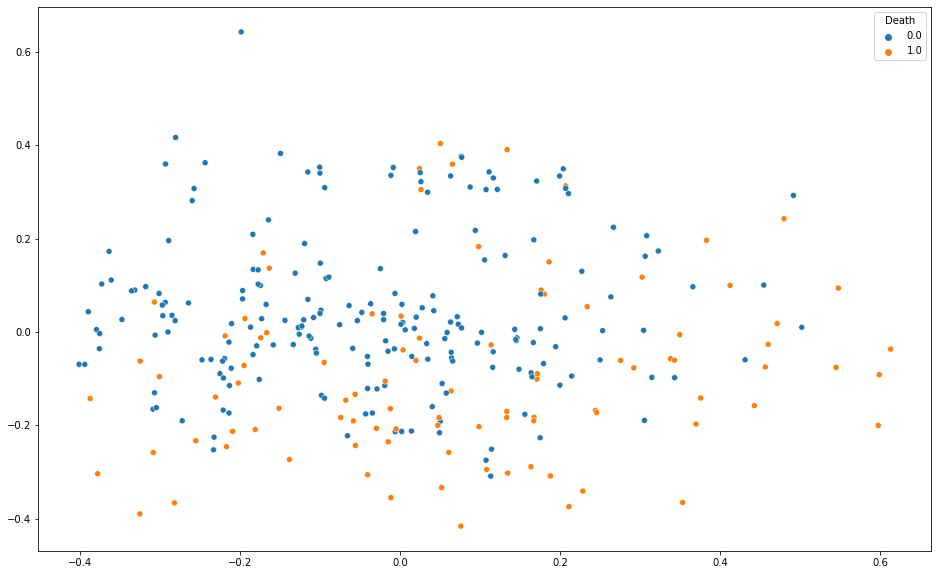

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=PC1, y=PC2,
    hue = "Death",
    data = scaled_df)

In [19]:
minPCA1 = np.argmin(PC1)
maxPCA1 = np.argmax(PC1)
minPCA2 = np.argmin(PC2)
maxPCA2 = np.argmax(PC2)

print(minPCA1)
print(maxPCA1)
print(minPCA2)
print(maxPCA2)

103
26
4
64


In [20]:
X = df_new[['CPK', 'Platelet Count','Creat','EF','Age', 'Serum Na']]
y = df_new[['Death']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Death   R-squared (uncentered):                   0.466
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              42.70
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                    2.57e-37
Time:                        17:51:50   Log-Likelihood:                         -160.49
No. Observations:                 299   AIC:                                      333.0
Df Residuals:                     293   BIC:                                      355.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CPK             3.735e-05   2.51e-05      1.487      0.138   -1.21e-05    8.68e-05
Platelet Count -6.429e-10   2.49e-07     -0.003      0.998    -4.9e-07    4.89e-07
Creat              0.1157      0.024      4.890      0.000       0.069       0.162
EF                -0.0106      0.002     -5.072      0.000      -0.015      -0.006
Age                0.0098      0.002      4.806      0.000       0.006       0.014
Serum Na          -0.0004      0.001     -0.363      0.717      -0.003       0.002
==============================================================================
Omnibus:                       35.628   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.550
Skew:                           0.583   Prob(JB):                     4.67e-06
Kurtosis:                       2.219   Cond. No.                     2.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
tsne_dat = TSNE(n_components=3, perplexity=40.0, n_iter=1000, verbose=1).fit_transform(scaled_df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 299 samples in 0.002s...
[t-SNE] Computed neighbors for 299 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 299 / 299
[t-SNE] Mean sigma: 11.043082
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.363022
[t-SNE] KL divergence after 1000 iterations: 2.052499


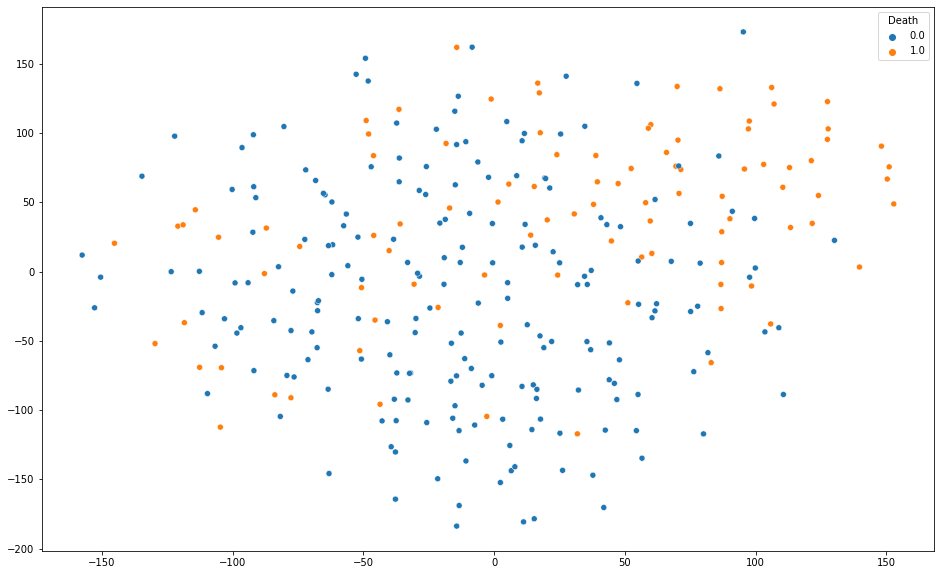

In [22]:
tsne_dat1 = tsne_dat[:,0]
tsne_dat2 = tsne_dat[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_dat1, y=tsne_dat2,
    data= scaled_df,
    hue="Death")

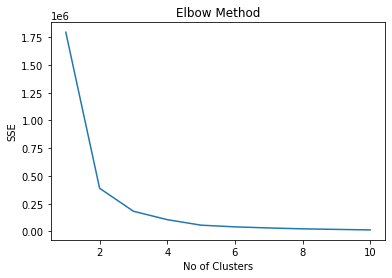

In [23]:
sse = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i).fit(scaled_df)
  kmeans.fit(scaled_df)
  sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("SSE")
plt.show()

In [57]:
from sklearn.metrics import accuracy_score

#Running the KMeans algorithm
kmeans = KMeans(n_clusters = 2, init= 'random', n_init= 10, max_iter = 100).fit(scaled_df.drop(columns='Death'))
kmeanslab = (kmeans.labels_ * -1) + 1
kmeanscc = kmeans.cluster_centers_
kmeans.predict(scaled_df.drop(columns='Death'))

accuracy_score(scaled_df['Death'], kmeanslab)

0.6521739130434783

In [25]:
print(kmeanslab)
print(kmeanscc)
print("Iterations: ",kmeans.n_iter_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[[3.38838862e-01 3.74045802e-01 6.73456190e-02 4.42748092e-01
  3.65833912e-01 2.67175573e-01 2.88701016e-01 8.67141264e-02
  6.80697928e-01 6.48854962e-01 3.12977099e-01 2.07931298e+02
  1.22137405e-01]
 [4.09956710e-01 4.76190476e-01 7.43812197e-02 3.98809524e-01
  3.64177489e-01 4.16666667e-01 2.88935242e-01 1.11135634e-01
  6.70578231e-01 6.48809524e-01 3.27380952e-01 6.96964286e+01
  

In [26]:
scaled_df.head

<bound method NDFrame.head of           Age  Anaemia       CPK  Diabetes  ...  Sex  Smoking   Time  Death
0    0.636364      0.0  0.071319       0.0  ...  1.0      0.0    4.0    1.0
1    0.272727      0.0  1.000000       0.0  ...  1.0      0.0    6.0    1.0
2    0.454545      0.0  0.015693       0.0  ...  1.0      1.0    7.0    1.0
3    0.181818      1.0  0.011227       0.0  ...  1.0      0.0    7.0    1.0
4    0.454545      1.0  0.017479       1.0  ...  0.0      0.0    8.0    1.0
..        ...      ...       ...       ...  ...  ...      ...    ...    ...
294  0.400000      0.0  0.004848       1.0  ...  1.0      1.0  270.0    0.0
295  0.272727      0.0  0.229268       0.0  ...  0.0      0.0  271.0    0.0
296  0.090909      0.0  0.259888       1.0  ...  0.0      0.0  278.0    0.0
297  0.090909      0.0  0.304925       0.0  ...  1.0      1.0  280.0    0.0
298  0.181818      0.0  0.022072       0.0  ...  1.0      1.0  285.0    0.0

[299 rows x 13 columns]>

In [36]:
plt.scatter(scaled_df["Death"], scaled_df["CPK"], c = kmeanslab, cmap = "viridis")
plt.title ("Actual vs Predicted - Death and CPK")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

Text(0.5, 1.0, 'Actual vs Predicted - Death and Age')

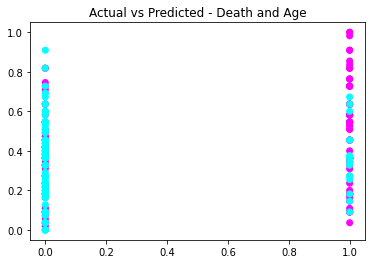

In [28]:
plt.scatter(scaled_df["Death"], scaled_df["Age"], c = kmeanslab, cmap = "cool", )
plt.title ("Actual vs Predicted - Death and Age")

Text(0.5, 1.0, 'Actual vs Predicted - Death and Platelet Count')

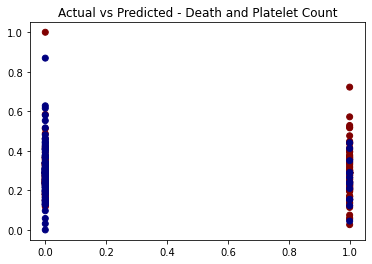

In [29]:
plt.scatter(scaled_df["Death"], scaled_df["Platelet Count"], c = kmeanslab, cmap = "jet")
plt.title ("Actual vs Predicted - Death and Platelet Count")

Text(0.5, 1.0, 'Actual vs Predicted - Death and EF')

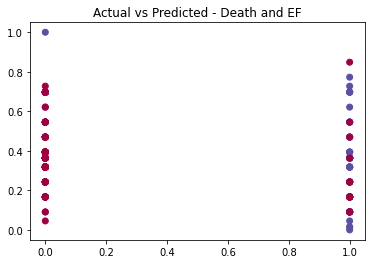

In [30]:
plt.scatter(scaled_df["Death"], scaled_df["EF"], c = kmeanslab, cmap = "Spectral")
plt.title ("Actual vs Predicted - Death and EF")

Text(0.5, 1.0, 'Actual vs Predicted - Death and Serum Na')

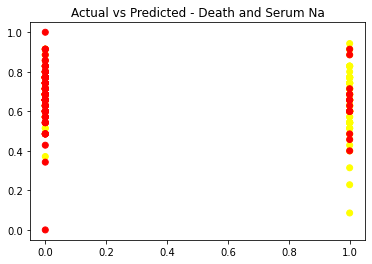

In [31]:
plt.scatter(scaled_df["Death"], scaled_df["Serum Na"], c = kmeanslab, cmap = "autumn")
plt.title ("Actual vs Predicted - Death and Serum Na")

Text(0.5, 1.0, 'Actual vs Predicted - Death and Creat')

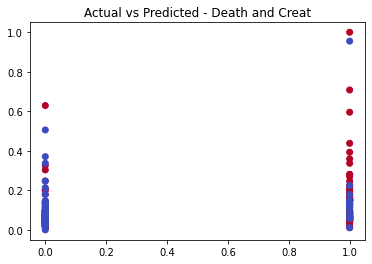

In [32]:
plt.scatter(scaled_df["Death"], scaled_df["Creat"], c = kmeanslab, cmap = "coolwarm")
plt.title ("Actual vs Predicted - Death and Creat")

In [33]:
#DBSCAN clustering algorithm to identify the number of clusters with Pearson's correlation distance as metric
clustering = DBSCAN(metric = 'correlation', eps= 0.5, min_samples = 5).fit(scaled_df)
clusteringlab = clustering.labels_
clusteringno = len(set(clusteringlab)) - (1 if -1 in clusteringlab else 0)
clusteringnoise = list(clusteringlab).count(-1)
core_samples_mask = np.zeros_like(clusteringlab, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
print('Estimated number of clusters: %d' % clusteringno)
print('Estimated number of noise points: %d' % clusteringnoise)

Estimated number of clusters: 1
Estimated number of noise points: 0


In [34]:
clustering1 = DBSCAN(eps= 0.5, min_samples = 5).fit(scaled_df)
clusteringlab1 = clustering1.labels_
clusteringno1 = len(set(clusteringlab1)) - (1 if -1 in clusteringlab1 else 0)
clusteringnoise1 = list(clusteringlab1).count(-1)
print('Estimated number of clusters: %d' % clusteringno1)
print('Estimated number of noise points: %d' % clusteringnoise1)

Estimated number of clusters: 0
Estimated number of noise points: 299
